# Импорт библиотек

In [1]:
import gc

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from pprint import pprint

plt.style.use('seaborn-whitegrid')
sns.set(style="ticks", color_codes=True)

# Анализ данных

Источник данных: https://www.kaggle.com/c/microsoft-malware-prediction/data

In [2]:
train_data_path = '../data/train.csv'

In [3]:
# Заранее предопределённые типы, чтобы при загрузке всех данных с помощью pandas
# расходовалось намного меньше памяти. 
# Типы позаимствованы отсюда: https://www.kaggle.com/theoviel/load-the-totality-of-the-datadtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64', 
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32', 
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32', 
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64', 
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64', 
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', 
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', 
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32', 
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64', 
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [4]:
train_data = pd.read_csv(train_data_path, dtype=dtypes)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float32
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                         

In [6]:
# Удостовериваемся, что импорт прошёл верно, просмотрев все столбцы в первых 5 строчках
pd.set_option('display.max_columns', len(train_data.columns))  
train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSI

In [7]:
cols = train_data.columns.to_list()

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBeta,8921483.0,7.509962e-06,2.740421e-03,0.0,0.0,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,8889165.0,NaN,0.000000e+00,0.0,7.0,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,8921483.0,1.733378e-02,1.305118e-01,0.0,0.0,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,433438.0,1.658356e+03,9.989604e+02,1.0,788.0,1632.0,2.373000e+03,3.213000e+03
AVProductStatesIdentifier,8885262.0,4.784002e+04,1.403237e+04,3.0,49480.0,53447.0,5.344700e+04,7.050700e+04
AVProductsInstalled,8885262.0,NaN,0.000000e+00,0.0,1.0,1.0,2.000000e+00,7.000000e+00
AVProductsEnabled,8885262.0,NaN,0.000000e+00,0.0,1.0,1.0,1.000000e+00,5.000000e+00
HasTpm,8921483.0,9.879711e-01,1.090149e-01,0.0,1.0,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,8921483.0,1.080490e+02,6.304706e+01,1.0,51.0,97.0,1.620000e+02,2.220000e+02
CityIdentifier,8596074.0,8.126650e+04,4.892339e+04,5.0,36825.0,82373.0,1.237000e+05,1.679620e+05


In [9]:
# True numerical columns according the description of the data
numerical_cols = [
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges'
]
categorical_cols = []

stat_cols = [('name', 'unique values', 'part of most popular')]

# Analisis each column and grouping by catecorical features
for col in cols[1:]:
    col_stat = train_data[col].value_counts()
    unique_values = len(col_stat)
    part_most_popular_val = col_stat.iloc[0] / col_stat.sum()
    stat_cols.append((col, unique_values, part_most_popular_val))

# Getting max width of each column for next printing
max_widths = []
stat_cols_transpose = np.asarray(stat_cols).transpose()
for row in stat_cols_transpose:
    max_widths.append(max( len(str(el)) for el in row ))

# Formatted printing
for row in stat_cols:
    formated_row = ''.join([str(el).ljust(max_widths[n]+2) for n,el in enumerate(row)])
    print(formated_row)

name                                               unique values  part of most popular  
ProductName                                        6              0.9893556934424468    
EngineVersion                                      70             0.43098966842171865   
AppVersion                                         110            0.5760504167300436    
AvSigVersion                                       8531           0.011468608974539322  
IsBeta                                             2              0.999992490037811     
RtpStateBitfield                                   7              0.9732620555473995    
IsSxsPassiveMode                                   2              0.9826662226448226    
DefaultBrowsersIdentifier                          2017           0.10625741167133478   
AVProductStatesIdentifier                          28970          0.6555310355507806    
AVProductsInstalled                                8              0.6987855844881108    
AVProductsEnabled    

Заметим, что существуют столбцы, с очень большой долей самого популярного элемента. При этом, количество уникальных элементов в них очень малое. Напрашивается вывод, что такие столбцы вряд ли смогут повлиять на результирующий столбец. Предположим, что столбцы с долей самого популярного элемента больше 98% не повлияют на результат. В следующей ячейке наглядно показаны такие столбцы.

In [10]:
MOST_PART = 0.98
useless_cols = []

# Пропуск первого элемента с названиями столбцов форматированого вывода
for stat in stat_cols[1:]:
    # 2 элемент кортежа stat показывает часть самого популярного значения в столбце
    if (stat[2] > MOST_PART):
        pprint(stat)
        useless_cols.append(stat[0])

('ProductName', 6, 0.9893556934424468)
('IsBeta', 2, 0.999992490037811)
('IsSxsPassiveMode', 2, 0.9826662226448226)
('HasTpm', 2, 0.9879710581749693)
('AutoSampleOptIn', 2, 0.9999710810411229)
('PuaMode', 2, 0.9991338241663058)
('SMode', 2, 0.9995370792263677)
('UacLuaenable', 11, 0.9939254677972246)
('Census_DeviceFamily', 3, 0.998382555904663)
('Census_IsPortableOperatingSystem', 2, 0.9994547991628746)
('Census_IsFlightingInternal', 2, 0.9999861177584278)
('Census_IsFlightsDisabled', 2, 0.9999899554386734)
('Census_ThresholdOptIn', 2, 0.9997492438904318)
('Census_IsWIMBootEnabled', 2, 0.9999996934189308)
('Census_IsVirtualDevice', 2, 0.9929605537233607)


In [11]:
categorical_cols = [col for col in cols[1:] if col not in useless_cols + numerical_cols]

In [12]:
pprint(categorical_cols)

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'Census_MDC2FormFactor',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_HasOpticalDiskDrive',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInsta

In [13]:
pprint(numerical_cols)

['Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges']


# Сохраняем данные только с необходимыми столбцами

In [16]:
train_data.drop(columns=useless_cols, inplace=True)

In [17]:
train_data.to_csv('../data/filtered_train_data.csv', index=False)

# Небольшая визуализация

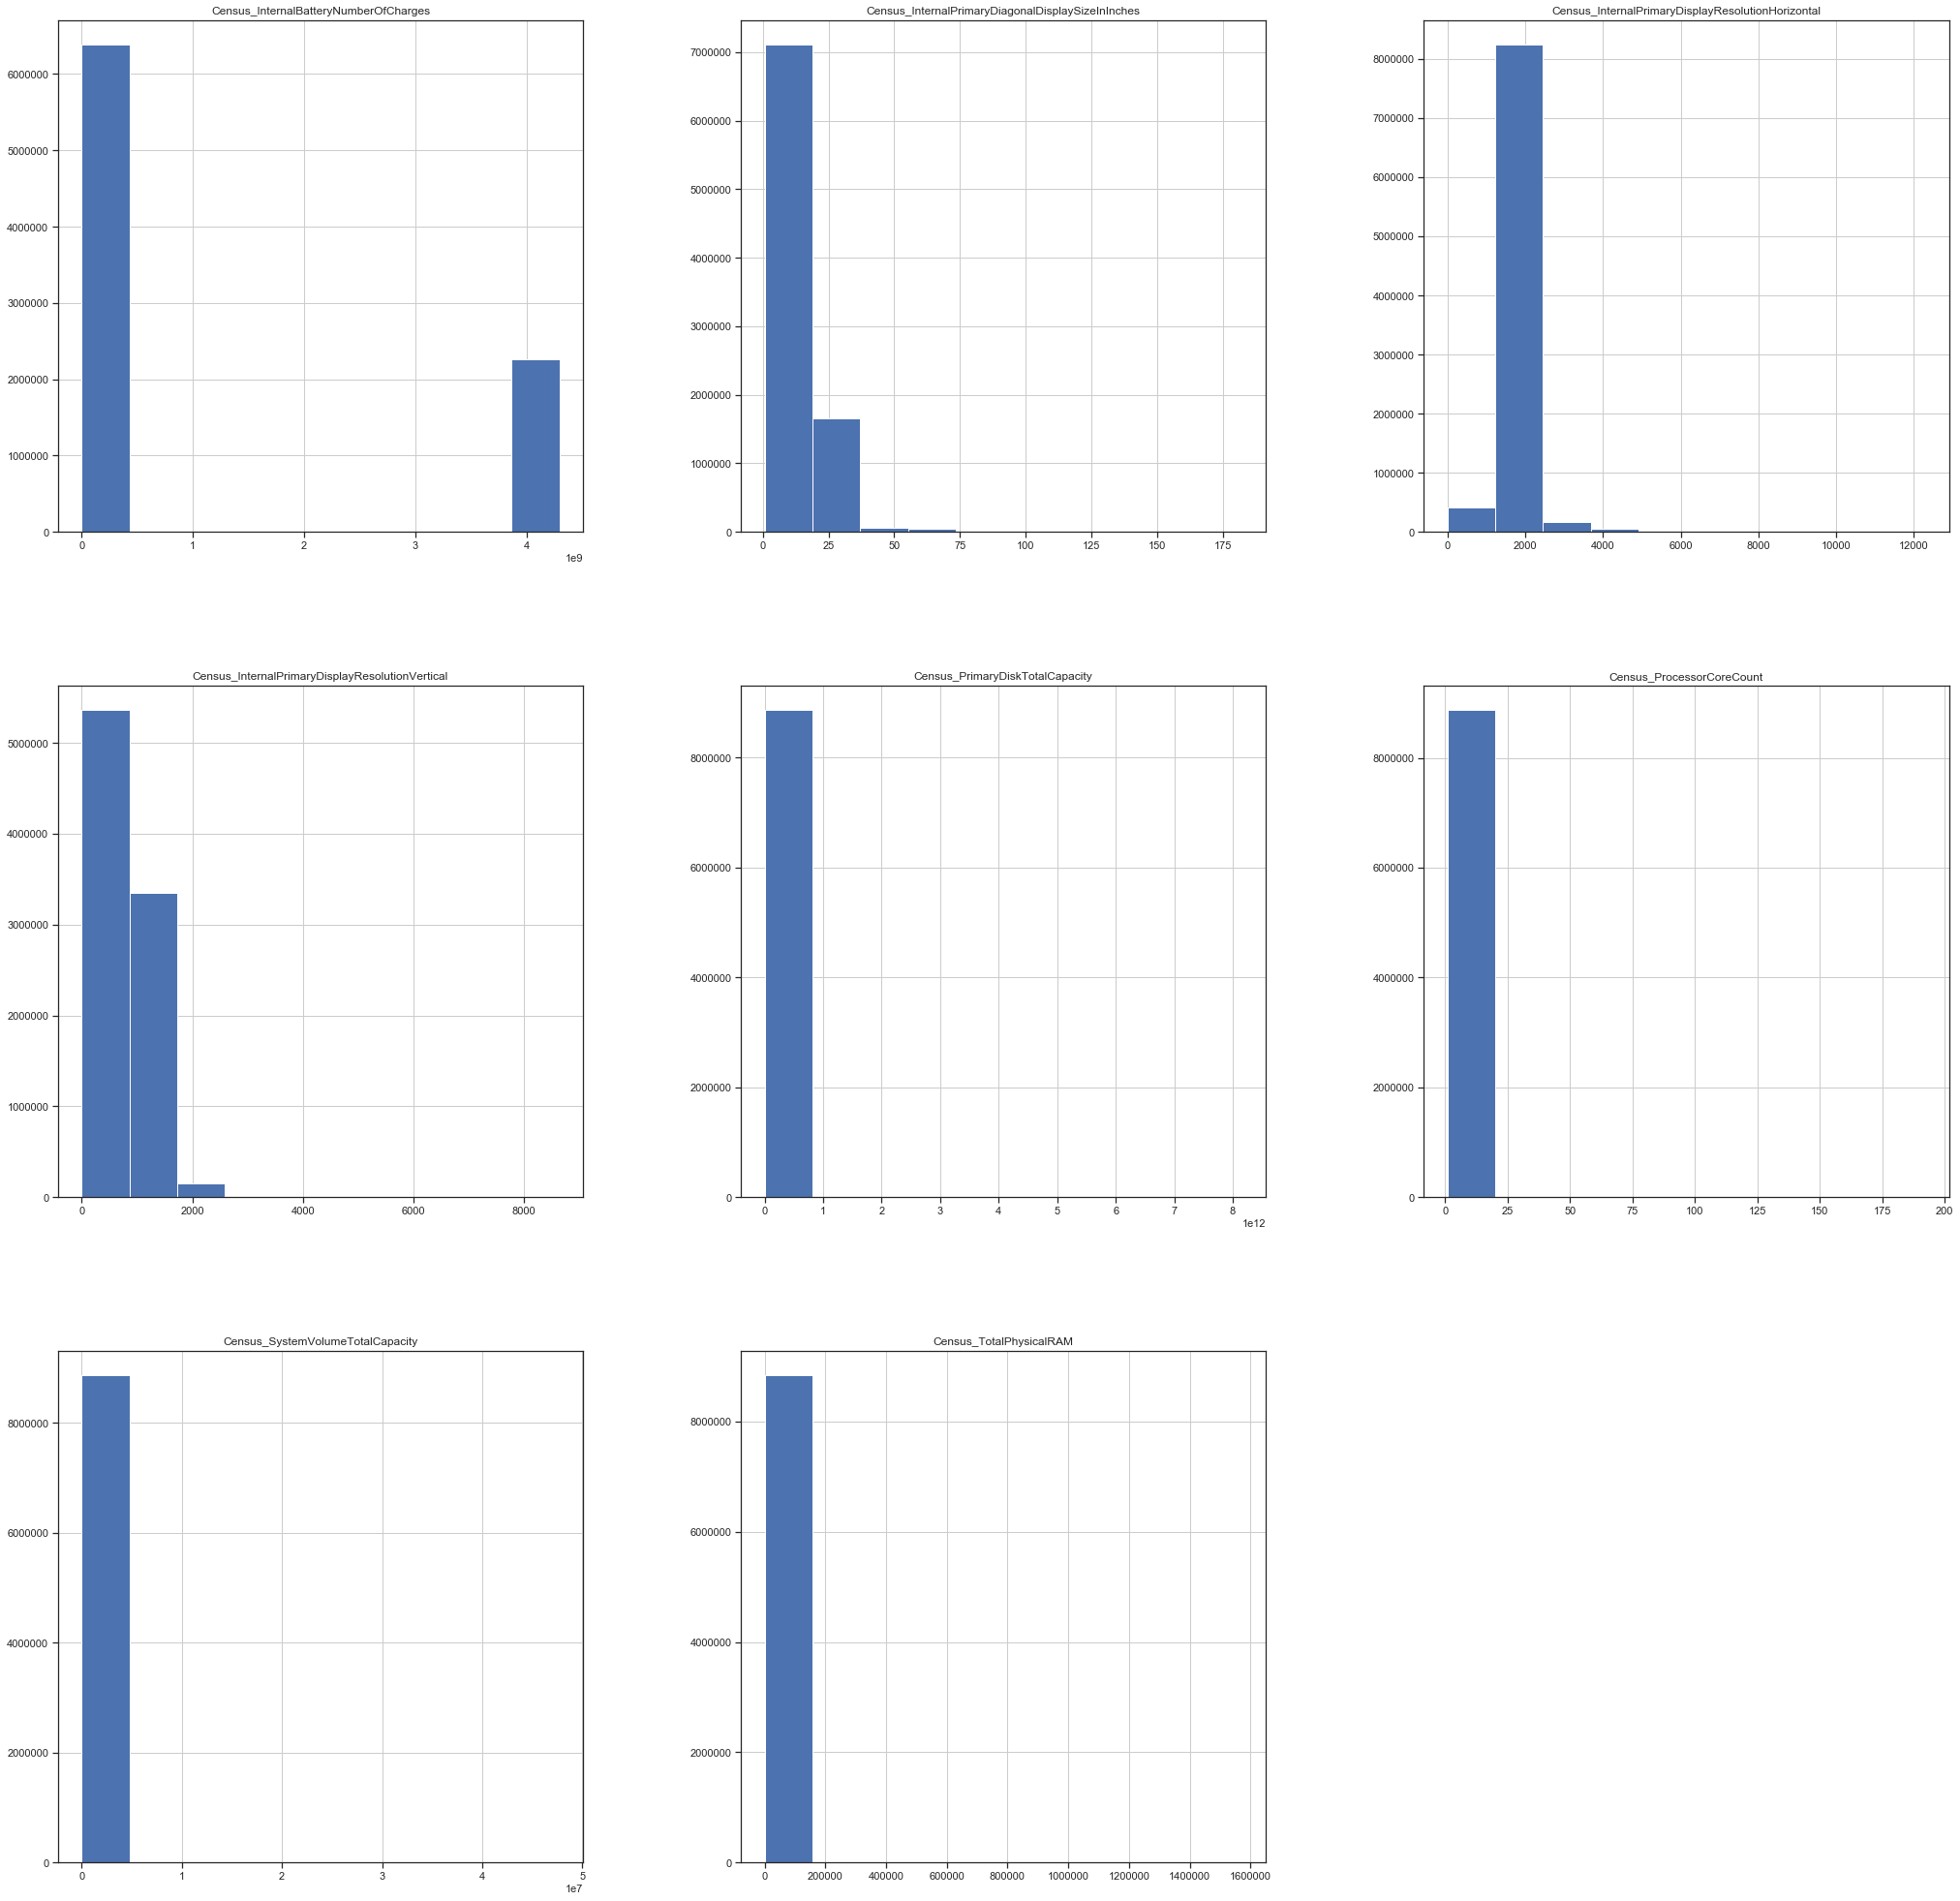

In [18]:
_ = train_data[numerical_cols].hist(figsize=(35,35))

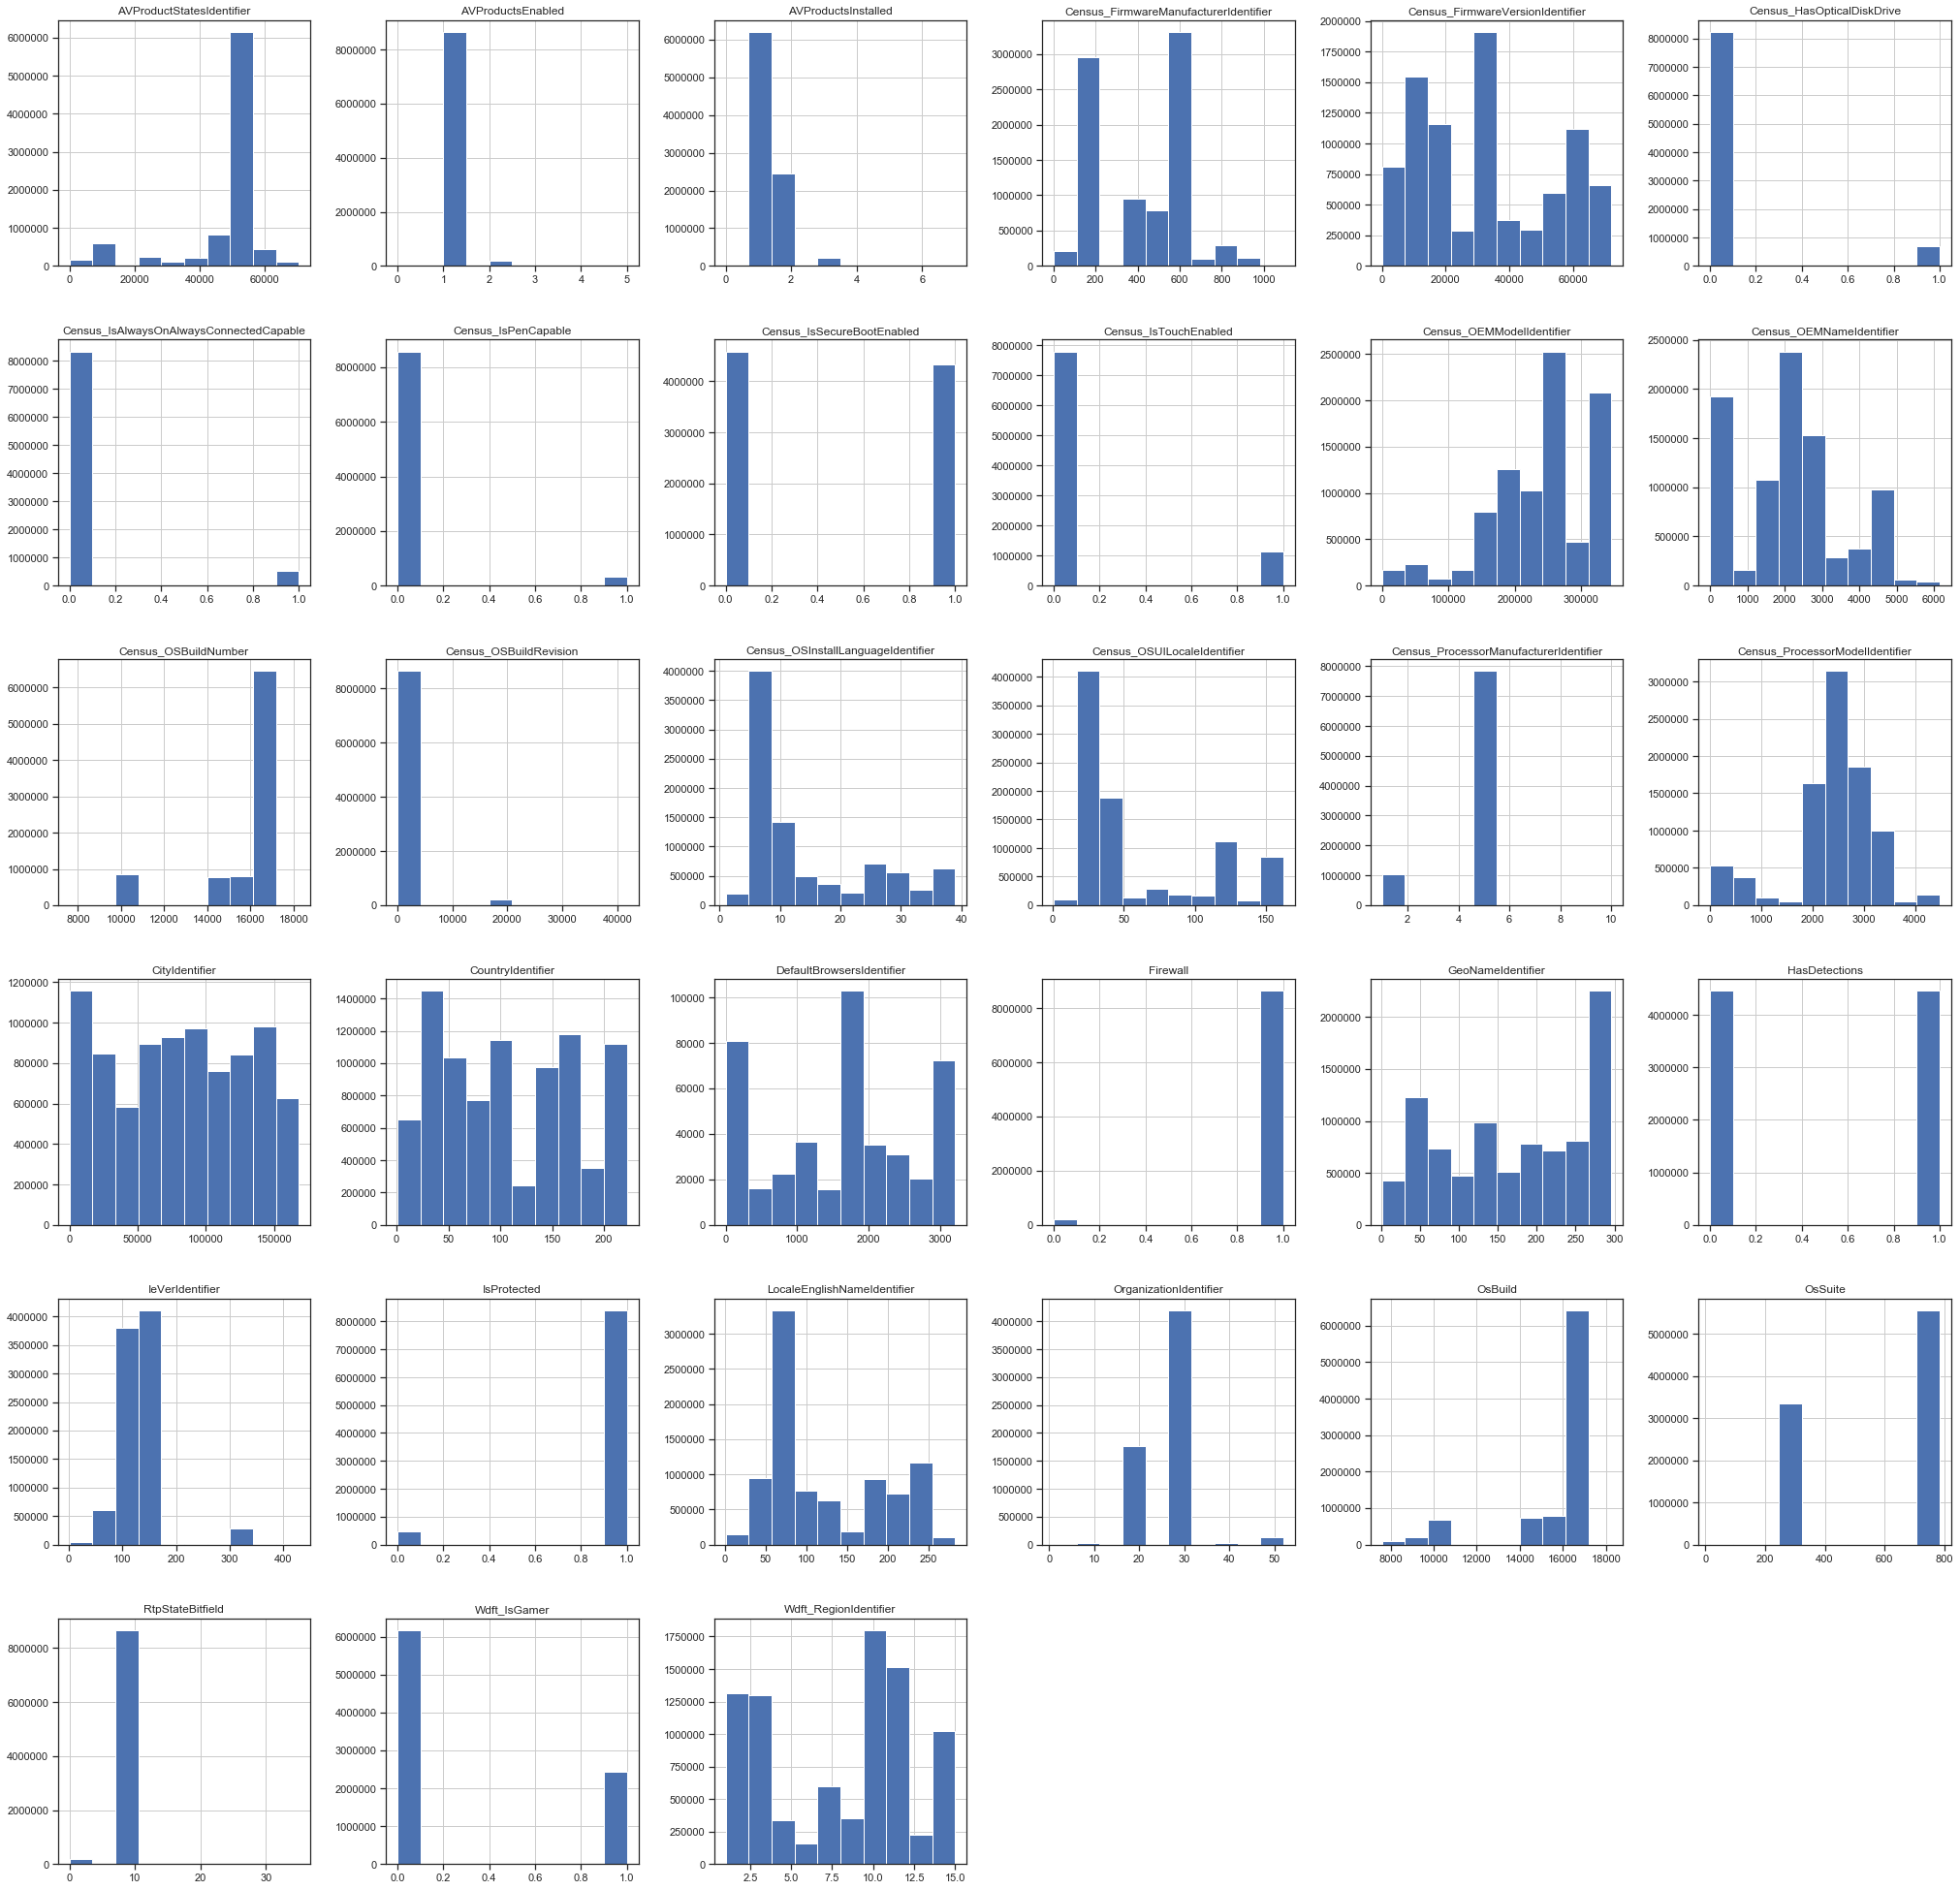

In [19]:
_ = train_data[categorical_cols].hist(figsize=(35,35))